image enhancement using spatial domian


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load an image
image_path = "/content/drive/MyDrive/photo_2024-08-18_20-43-24.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)


# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# We define display_images function here and we use it below
# To avoid code redundancy

def display_images(original, processed, title):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title)

    plt.show()



### **histogram equalization for contrast enhancement**

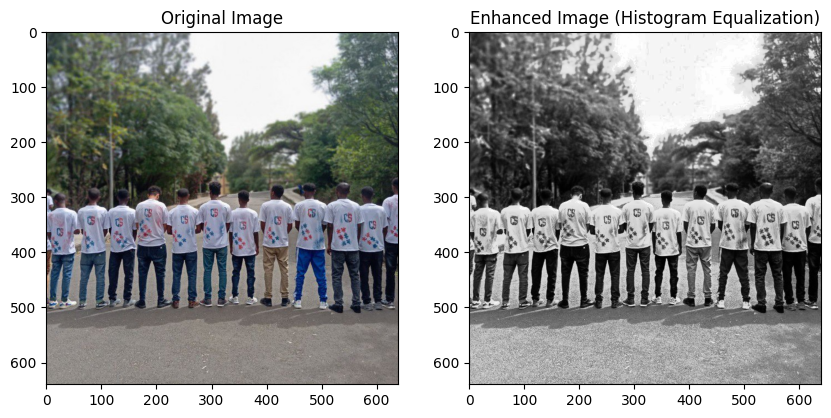

In [4]:
equalized_image = cv2.equalizeHist(gray_image)

display_images(image, equalized_image, 'Enhanced Image (Histogram Equalization)')


### **Logarthimic transformation**

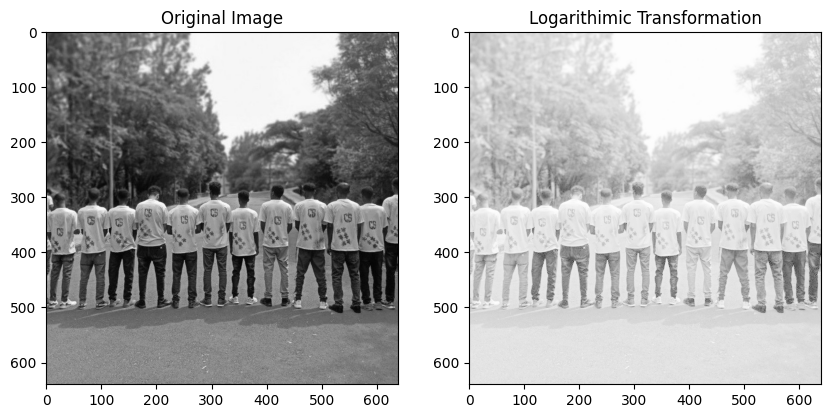

In [36]:
def logarithmic_transformation(image, c=1.0):
    image_float = np.float32(image)

    log_transformed = c * np.log(1 + image_float)

    log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)

    log_transformed = np.uint8(log_transformed)

    return log_transformed

log_transformed_image = logarithmic_transformation(gray_image, c=1.0)

display_images(image, log_transformed_image, 'Logarithimic Transformation')


### Smoothing

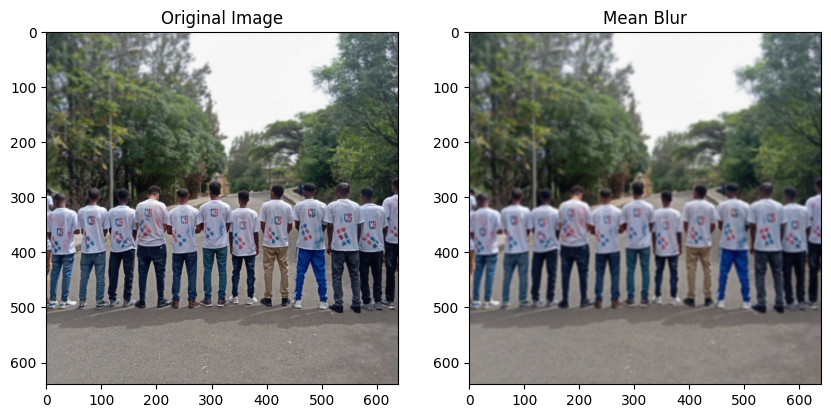

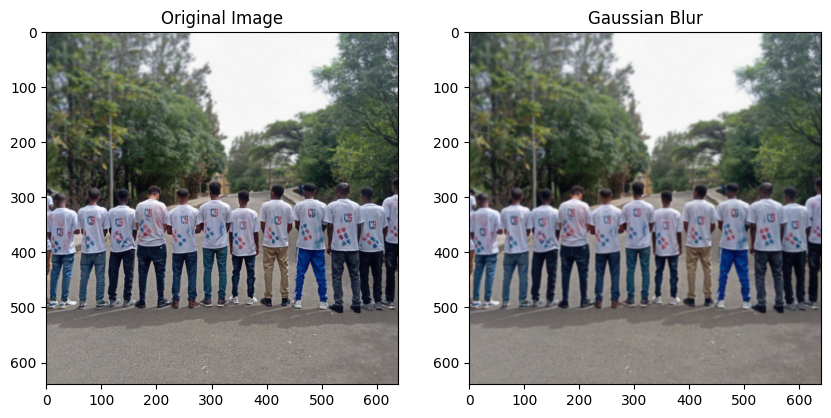

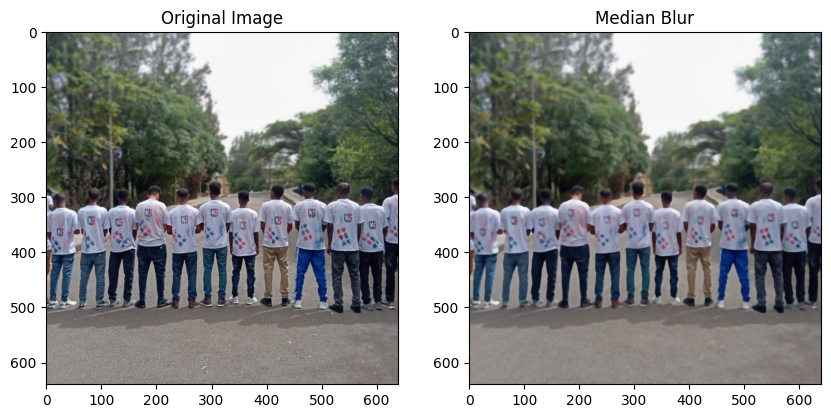

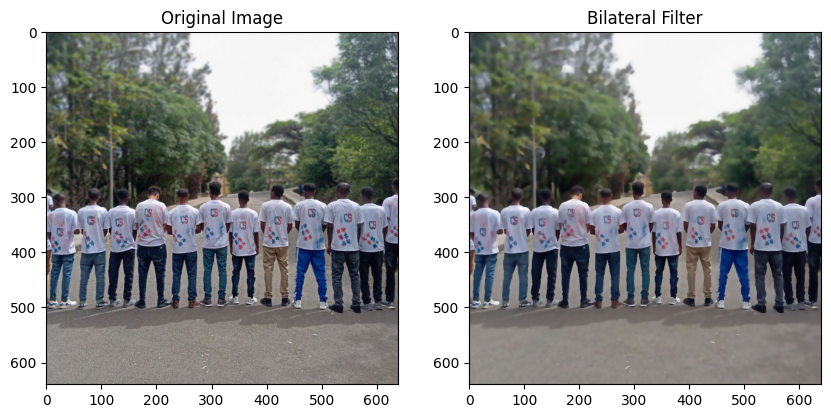

In [6]:
#   Mean Blur
def mean_blur(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

#  Gaussian Blur
def gaussian_blur(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

#  Median Blur
def median_blur(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

#  Bilateral Filter
def bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

mean_blurred_image = mean_blur(image, kernel_size=5)
gaussian_blurred_image = gaussian_blur(image, kernel_size=5)
median_blurred_image = median_blur(image, kernel_size=5)
bilateral_filtered_image = bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75)

# Display the results

display_images(image, mean_blurred_image, 'Mean Blur')
display_images(image, gaussian_blurred_image, 'Gaussian Blur')
display_images(image, median_blurred_image, 'Median Blur')
display_images(image, bilateral_filtered_image, 'Bilateral Filter')


### **Contrast Stretching**

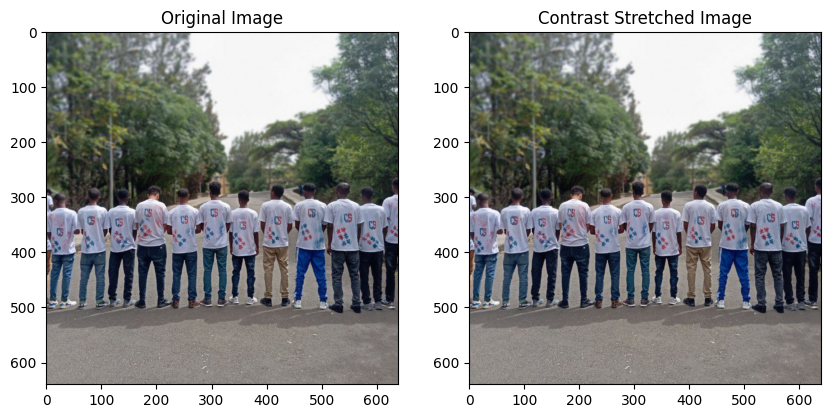

In [7]:
# Contrast Stretching Function
def contrast_stretch(image):
    # Get the minimum and maximum intensity values in the image
    min_val = np.min(image)
    max_val = np.max(image)

    # Perform contrast stretching
    stretched = ((image - min_val) / (max_val - min_val)) * 255
    stretched = stretched.astype(np.uint8)

    return stretched

contrast_stretched_image = contrast_stretch(image)

display_images(image, contrast_stretched_image, 'Contrast Stretched Image')


### **Sharpening**

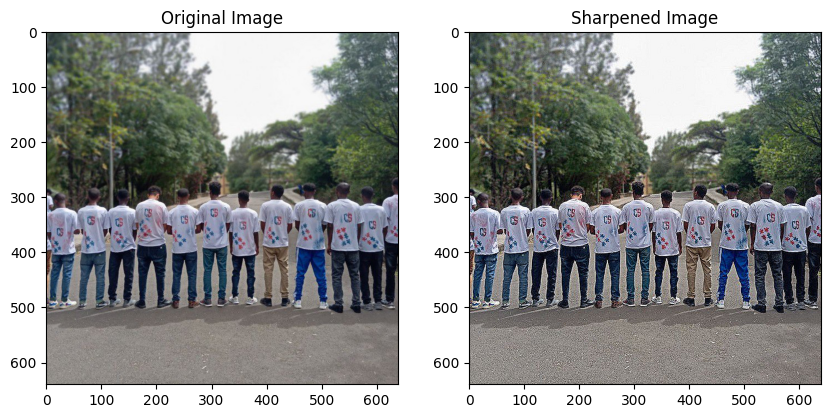

In [8]:
# Sharpening function using kernel convolution
def sharpen_image(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

    sharpened = cv2.filter2D(image, -1, kernel)

    return sharpened

sharpened_image = sharpen_image(image)

display_images(image, sharpened_image, 'Sharpened Image')


### **Power-Law (Gamma) Transformation**

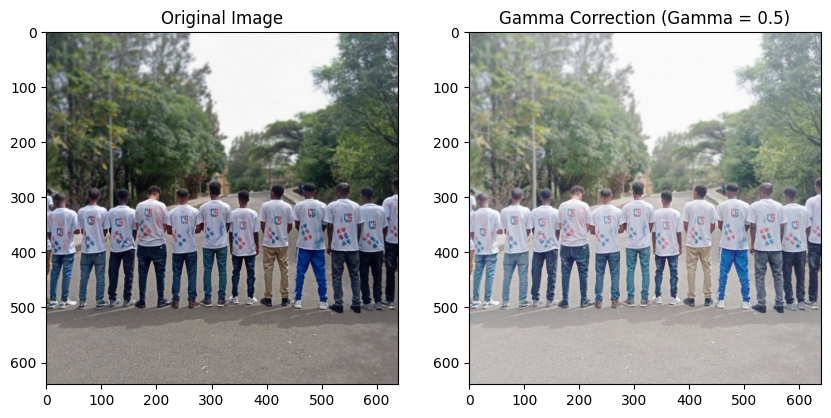

In [13]:
# Power-Law (Gamma) Transformation Function
def gamma_transformation(image, gamma):
    # Normalize the image to the range [0,1]
    normalized_image = image / 255.0

    # Apply the power-law (gamma) transformation
    gamma_corrected = np.power(normalized_image, gamma)

    gamma_corrected = np.uint8(gamma_corrected * 255)

    return gamma_corrected

# Define gamma value
gamma_value = 0.5

gamma_corrected_image = gamma_transformation(image, gamma_value)

display_images(image, gamma_corrected_image, f'Gamma Correction (Gamma = {gamma_value})')


### **Morphological operations**

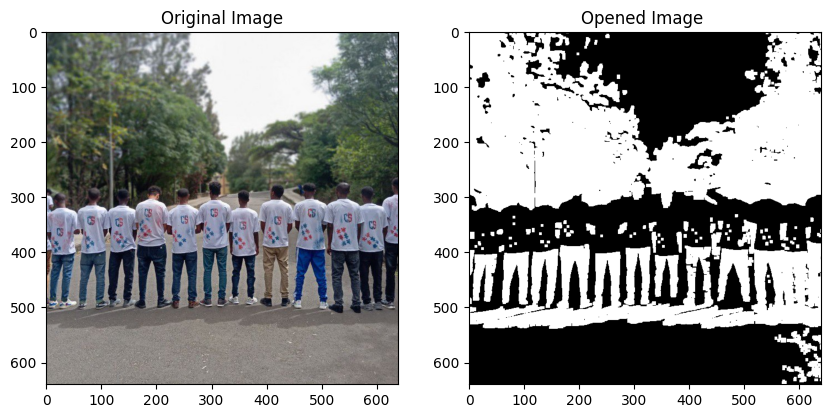

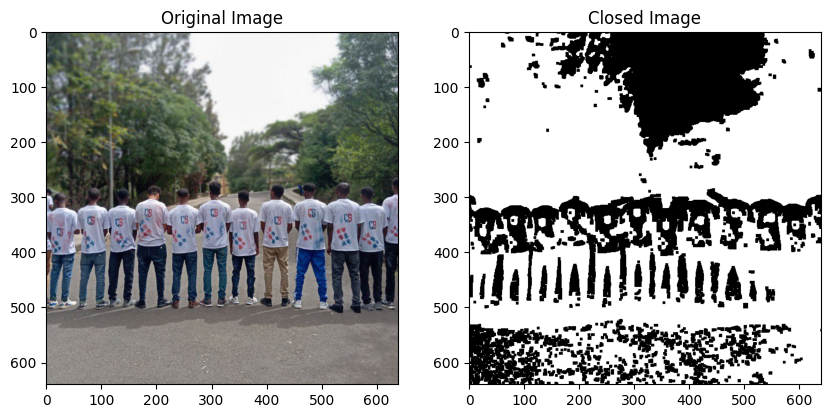

In [15]:
# Apply a binary threshold to create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel (structuring element)
kernel = np.ones((5,5), np.uint8)

# Opening (Erosion followed by Dilation)
def opening_operation(binary_image, kernel):
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    return opening

#  Closing (Dilation followed by Erosion)
def closing_operation(binary_image, kernel):
    closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    return closing

opened_image = opening_operation(binary_image, kernel)

closed_image = closing_operation(binary_image, kernel)

display_images(image, cv2.cvtColor(opened_image, cv2.COLOR_GRAY2BGR), 'Opened Image ')
display_images(image, cv2.cvtColor(closed_image, cv2.COLOR_GRAY2BGR), 'Closed Image')


### **Edge detection**

### **Sobel**

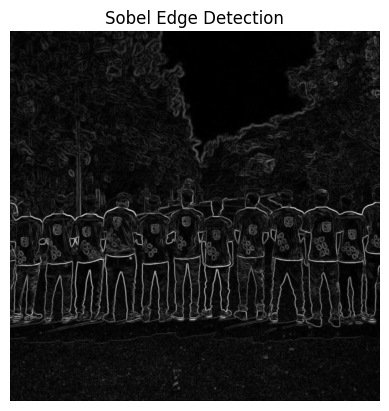

In [43]:
image = cv2.imread('/content/drive/MyDrive/photo_2024-08-18_20-43-24.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y direction
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Display the result
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

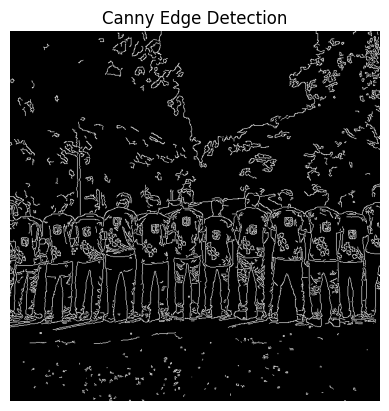

In [44]:
canny_edges = cv2.Canny(image, 100, 200)

plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

### **Laplacian**

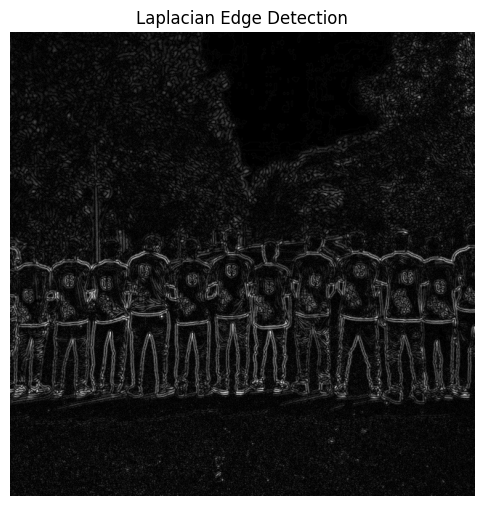

In [45]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Prewitt**

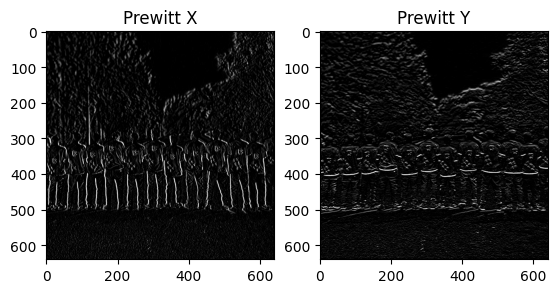

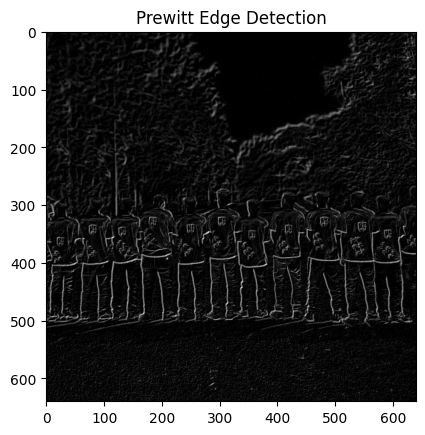

In [46]:
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

img_prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)
img_prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)

prewitt_edge = cv2.addWeighted(img_prewitt_x, 0.5, img_prewitt_y, 0.5, 0)

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 2), plt.imshow(img_prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(1, 3, 3), plt.imshow(img_prewitt_y, cmap='gray'), plt.title('Prewitt Y')
plt.figure(), plt.imshow(prewitt_edge, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.show()
